## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [119]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [120]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [121]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [122]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [123]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [124]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")
bitstamp["Close"]

<ipython-input-124-0b9bb192469f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129540, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [125]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp["Close"] = bitstamp["Close"].astype("float")
bitstamp["Close"]

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129540, dtype: float64

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [126]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp.duplicated().sum()
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [127]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Step 1 - remove NaN values
coinbase.dropna()

#Step 2 - replace "$" with ""
coinbase['Close'] = coinbase['Close'].str.replace("$", "")

# Step 3 - convert close data to float
coinbase["Close"] = coinbase["Close"].astype("float")

#Step 4 - remove any duplicates
coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()


<ipython-input-127-a465e49dd91d>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  coinbase['Close'] = coinbase['Close'].str.replace("$", "")


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [128]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [129]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [130]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [131]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Datafram: Full Length'}, xlabel='Timestamp', ylabel='Close Price'>

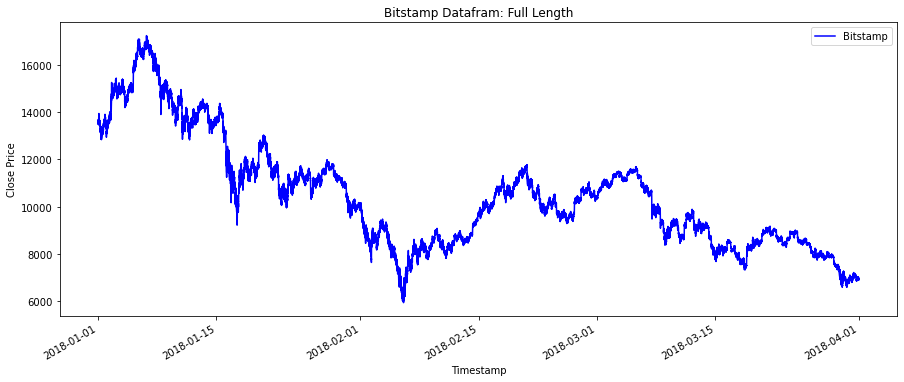

In [132]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(title = 'Bitstamp Datafram: Full Length', color = "blue", figsize=(15,6), legend = True, xlabel='Timestamp',ylabel='Close Price', label="Bitstamp")

<AxesSubplot:title={'center':'Coinbase Dataframe: Full Length'}, xlabel='Timestamp', ylabel='Close Price'>

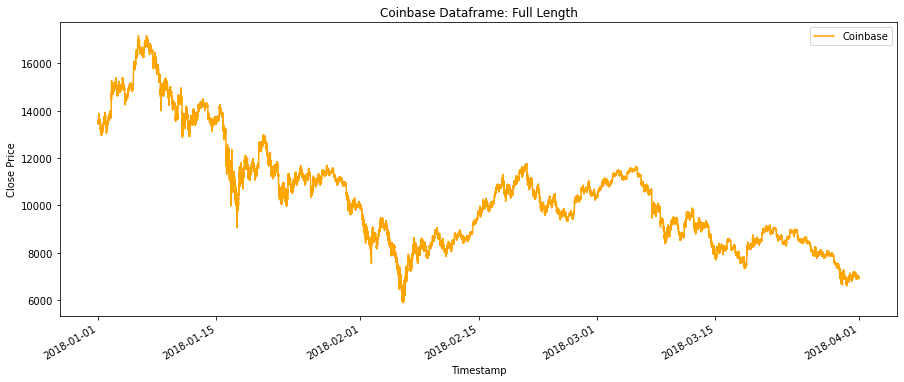

In [133]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(title = 'Coinbase Dataframe: Full Length', color = 'orange', legend = True, figsize=(15,6), xlabel='Timestamp',ylabel='Close Price', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp', ylabel='Close Price'>

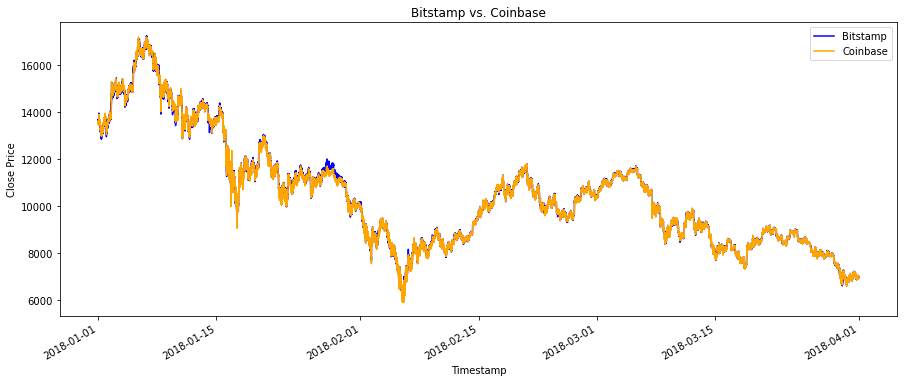

In [134]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced.plot(legend=True, title="Bitstamp vs. Coinbase", color = "blue", figsize=(15,6),label = "Bitstamp",xlabel='Timestamp',ylabel='Close Price')
coinbase_sliced.plot(legend=True, color="orange", figsize=(15,6),label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase: January'}, xlabel='Timestamp', ylabel='Close Price'>

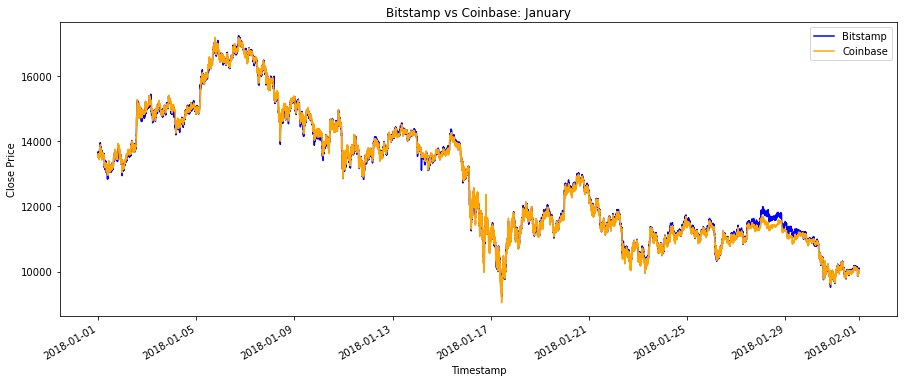

In [135]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,6),title="Bitstamp vs Coinbase: January", xlabel='Timestamp',ylabel='Close Price',color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,6),color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase: March'}, xlabel='Timestamp', ylabel='Close Price'>

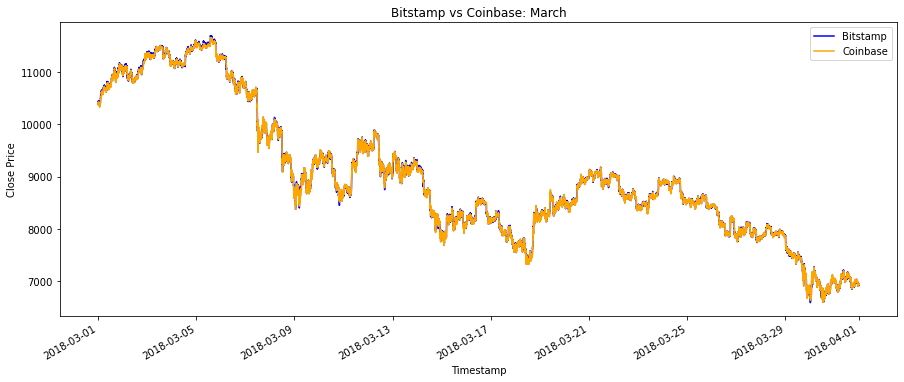

In [136]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, title="Bitstamp vs Coinbase: March", figsize=(15,6),color="blue", xlabel='Timestamp',ylabel='Close Price', label="Bitstamp")
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15,6),color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It appears that the greatest spread is located in the middle of the given time period when observing the graph that contains the full length of time. However, when analyzing specific days (below) it does appear the there is a larger spread in the later time period, meaning that there is a greater opportunity for arbitrage. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase: January 10th'}, xlabel='Timestamp', ylabel='Close Price'>

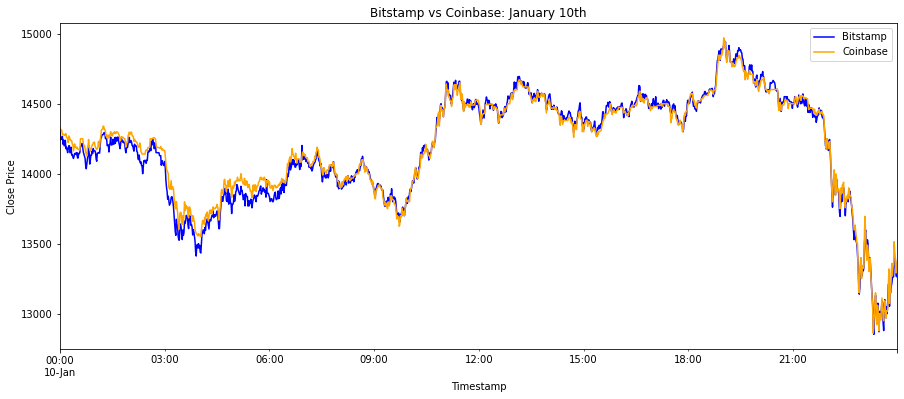

In [137]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-01-10'].plot(legend=True, title="Bitstamp vs Coinbase: January 10th", figsize=(15,6),color="blue", xlabel='Timestamp',ylabel='Close Price',label="Bitstamp")
coinbase_sliced.loc['2018-01-10'].plot(legend=True, figsize=(15,6),color="orange", label="Coinbase")


In [139]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-10'] - bitstamp_sliced.loc['2018-01-10']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread: Early'}>

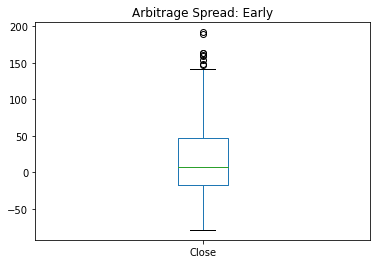

In [140]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box', title="Arbitrage Spread: Early")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase: February 3rd'}, xlabel='Timestamp', ylabel='Close Price'>

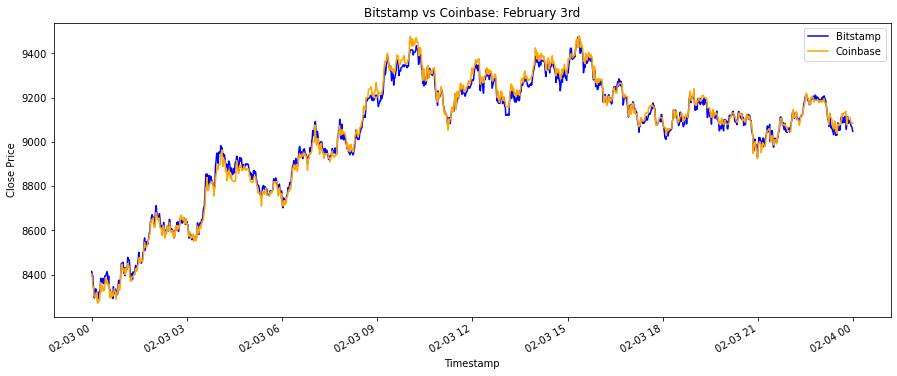

In [141]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-02-03'].plot(legend=True, title="Bitstamp vs Coinbase: February 3rd", figsize=(15,6),color="blue", xlabel='Timestamp',ylabel='Close Price',label="Bitstamp")
coinbase_sliced.loc['2018-02-03'].plot(legend=True, color="orange", figsize=(15,6),label="Coinbase")

In [142]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-03'] - bitstamp_sliced.loc['2018-02-03']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1430.000000
mean        3.280021
std        22.406455
min       -87.000000
25%       -11.697500
50%         3.575000
75%        19.747500
max        64.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread: Middle'}>

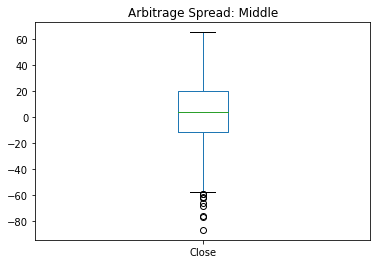

In [143]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box', title="Arbitrage Spread: Middle")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase: March 5th'}, xlabel='Timestamp', ylabel='Close Price'>

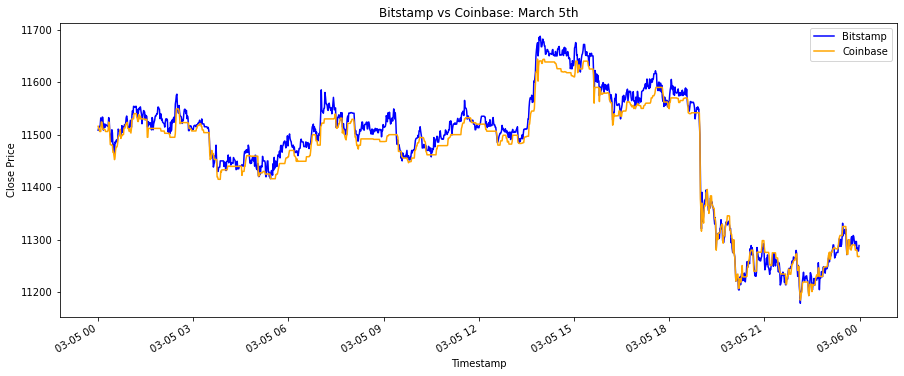

In [144]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-03-05'].plot(legend=True, title="Bitstamp vs Coinbase: March 5th", figsize=(15,6),color="blue", xlabel='Timestamp',ylabel='Close Price',label="Bitstamp")
coinbase_sliced.loc['2018-03-05'].plot(legend=True, figsize=(15,6),color="orange", label="Coinbase")

In [146]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-05'] - coinbase_sliced.loc['2018-03-05']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean       11.817683
std        14.276780
min       -33.180000
25%         2.940000
50%        11.500000
75%        20.470000
max        68.280000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread: Late'}>

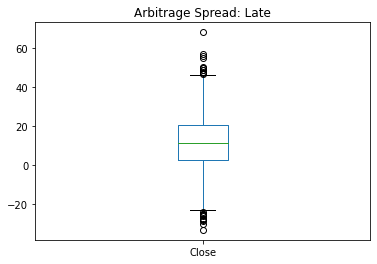

In [147]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind='box', title="Arbitrage Spread: Late")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [148]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced['2018-01-01']-coinbase_sliced['2018-01-01']
arbitrage_spread_middle = bitstamp_sliced['2018-02-03'] - coinbase_sliced['2018-02-03']
arbitrage_spread_late = bitstamp_sliced['2018-03-05'] - coinbase_sliced['2018-03-05']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
print(arbitrage_spread_early[arbitrage_spread_early>0].describe())
print(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())
print(arbitrage_spread_late[arbitrage_spread_late>0].describe())



count    636.000000
mean      34.664418
std       24.260997
min        0.010000
25%       14.587500
50%       30.605000
75%       51.685000
max      142.000000
Name: Close, dtype: float64
count    635.000000
mean      16.799480
std       13.582079
min        0.010000
25%        6.250000
50%       13.820000
75%       23.130000
max       87.000000
Name: Close, dtype: float64
count    1155.000000
mean       16.740208
std        10.860019
min         0.020000
25%         8.880000
50%        14.790000
75%        23.195000
max        68.280000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [149]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/coinbase_sliced['2018-01-01']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]/coinbase_sliced['2018-02-03']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0]/coinbase_sliced['2018-03-05']

# Review the spread return DataFrame
# YOUR CODE HERE
print(spread_return_early.describe())
print(spread_return_middle.describe())
print(spread_return_late.describe())

count    6.360000e+02
mean     2.567991e-03
std      1.786459e-03
min      7.326013e-07
25%      1.075328e-03
50%      2.294832e-03
75%      3.800214e-03
max      1.029135e-02
Name: Close, dtype: float64
count    635.000000
mean       0.001905
std        0.001553
min        0.000001
25%        0.000700
50%        0.001543
75%        0.002621
max        0.009861
Name: Close, dtype: float64
count    1155.000000
mean        0.001455
std         0.000940
min         0.000002
25%         0.000772
50%         0.001288
75%         0.002023
max         0.005929
Name: Close, dtype: float64


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [150]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
# YOUR CODE HERE
print(profitable_trades_early.head())
print(profitable_trades_middle.head())
print(profitable_trades_late.head())

Timestamp
2018-01-01 01:58:00    0.010291
Name: Close, dtype: float64
Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [151]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
print(profitable_trades_early.describe())
print(profitable_trades_middle.describe())
print(profitable_trades_late.describe())

count    1.000000
mean     0.010291
std           NaN
min      0.010291
25%      0.010291
50%      0.010291
75%      0.010291
max      0.010291
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [159]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*bitstamp_sliced['2018-01-01']
profit_middle = profitable_trades_middle*bitstamp_sliced['2018-02-03']
profit_late = profitable_trades_late*bitstamp_sliced['2018-03-05']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
print(profit_per_trade_early.head())
print(profit_per_trade_middle.head())
print(profit_per_trade_late.head())


Series([], Name: Close, dtype: bool)
Timestamp
2018-01-01 01:58:00    143.461371
Name: Close, dtype: float64
Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [153]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
print(profit_per_trade_early.describe())
print(profit_per_trade_middle.describe())
print(profit_per_trade_late.describe())

count      1.000000
mean     143.461371
std             NaN
min      143.461371
25%      143.461371
50%      143.461371
75%      143.461371
max      143.461371
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


<AxesSubplot:title={'center':'Total Profit'}, xlabel='Timestamp', ylabel='Profit'>

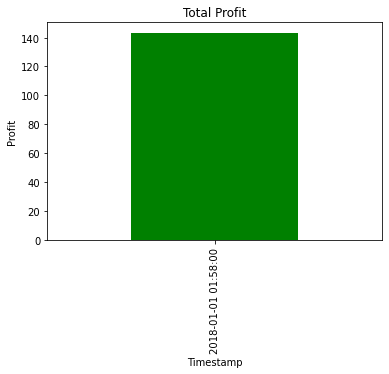

In [165]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(kind='bar', xlabel="Timestamp", ylabel="Profit", title="Total Profit", color="green")
#Only my early trade yeileded 1 profit opporunity 

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [155]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early_sum=profit_per_trade_early.sum()
profit_early_sum
#Only my early trade yeileded 1 profit opporunity 

143.4613712132193

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [156]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early
#Only my early trade yeileded 1 profit opporunity 

Timestamp
2018-01-01 01:58:00    143.461371
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum of the Profits'}, xlabel='Timestamp'>

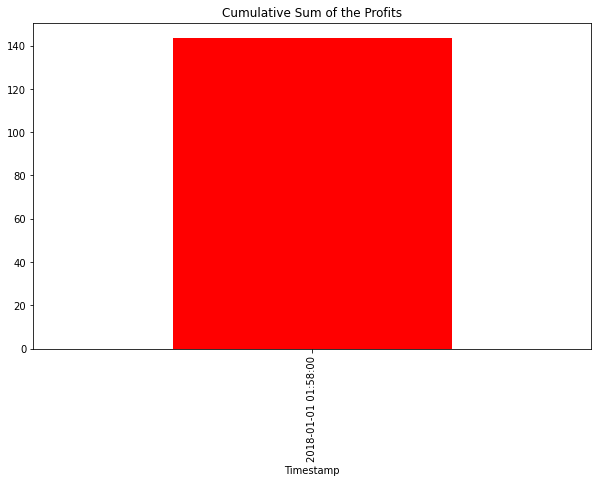

In [167]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize=(10,6), title="Cumulative Sum of the Profits",kind='bar', color='red')
#Only my early trade yeileded 1 profit opporunity 

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** I only have 1 arbitrae opportunity in the 3 days that I selected so I cannot identify a trend from that. However, it does appear that as time went on, there was a greater spread between Bitstamp and Coinbase. Therefore, I suspect that there was a general trend of separation between Bitstamp and Coinbase throughout the given time period that could yield more arbitrage opportunities. 